#**CAR**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
!pip install klib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
ds=pd.read_csv("data_car.csv")

In [3]:
ds

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


The dataset contains a total of 11,915 rows (car entries) and 16 columns (car attributes).

#**EDA**

In [4]:
#Checking the information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
# Checking the shape of the dataset
print("Shape of the dataset:", ds.shape)

Shape of the dataset: (11914, 16)


In [6]:
# Summary statistics
print("Summary statistics:")
print(ds.describe())

Summary statistics:
               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000 

In [7]:
# Checking the data types of each column
print("Data types:")
print(ds.dtypes)

Data types:
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [8]:
# Checking for missing values
print("Missing values:")
print(ds.isnull().sum())

Missing values:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


There are 3 missing values in the "Engine Fuel Type" column. 

There are 69 missing values in the "Engine HP" column. 

There are 30 missing values in the "Engine Cylinders" column.

There are 6 missing values in the "Number of Doors" column. 

There are 3,742 missing values in the "Market Category" column.

#**Pre-processing**

In [9]:
#For categorical variables like "Engine Fuel Type" and "Market Category", we use Mode to fill
ds["Engine Fuel Type"].fillna(ds["Engine Fuel Type"].mode()[0], inplace=True)
ds["Market Category"].fillna(ds["Market Category"].mode()[0], inplace=True)

In [10]:
#For numerical variables like "Engine HP," "Engine Cylinders," and "Number of Doors," we can fill the missing values with the mean
ds["Engine HP"].fillna(ds["Engine HP"].mean(), inplace=True)
ds["Engine Cylinders"].fillna(ds["Engine Cylinders"].mean(), inplace=True)
ds["Number of Doors"].fillna(ds["Number of Doors"].mean(), inplace=True)

In [11]:
import klib as k
k.clean_column_names(ds)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [12]:
ds.isnull().mean()*100

make                 0.0
model                0.0
year                 0.0
engine_fuel_type     0.0
engine_hp            0.0
engine_cylinders     0.0
transmission_type    0.0
driven_wheels        0.0
number_of_doors      0.0
market_category      0.0
vehicle_size         0.0
vehicle_style        0.0
highway_mpg          0.0
city_mpg             0.0
popularity           0.0
msrp                 0.0
dtype: float64

In [13]:
ds.fillna(ds.mean(), inplace=True)

In [14]:
ds.duplicated().sum()

715

In [15]:
ds.drop_duplicates()


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


In [16]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
year,11914.0,2010.384338,7.579740,1990.0,2007.0,2015.0,2016.00,2017.0
engine_hp,11914.0,249.386070,108.875192,55.0,170.0,227.0,300.00,1001.0
engine_cylinders,11914.0,5.628829,1.778316,0.0,4.0,6.0,6.00,16.0
number_of_doors,11914.0,3.436093,0.881093,2.0,2.0,4.0,4.00,4.0
highway_mpg,11914.0,26.637485,8.863001,12.0,22.0,26.0,30.00,354.0
city_mpg,11914.0,19.733255,8.987798,7.0,16.0,18.0,22.00,137.0
popularity,11914.0,1554.911197,1441.855347,2.0,549.0,1385.0,2009.00,5657.0
msrp,11914.0,40594.737032,60109.103604,2000.0,21000.0,29995.0,42231.25,2065902.0


####**Univariate Analysis**

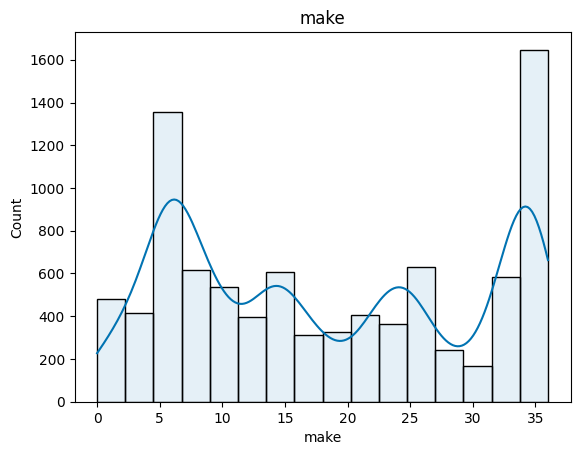

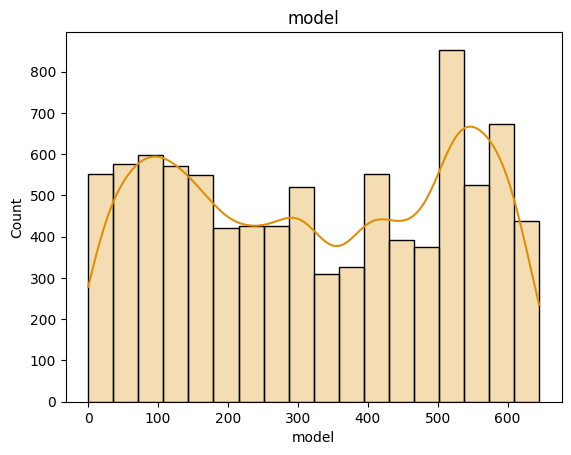

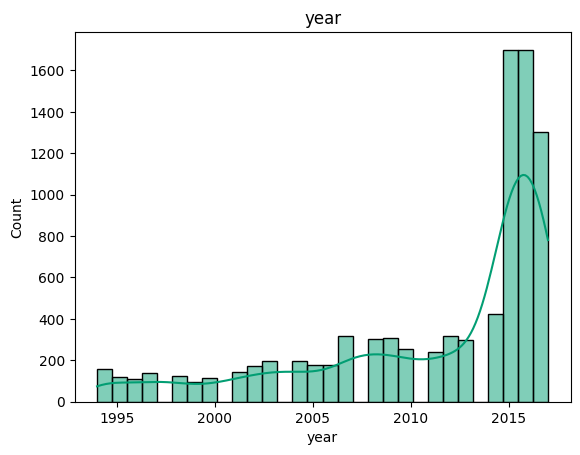

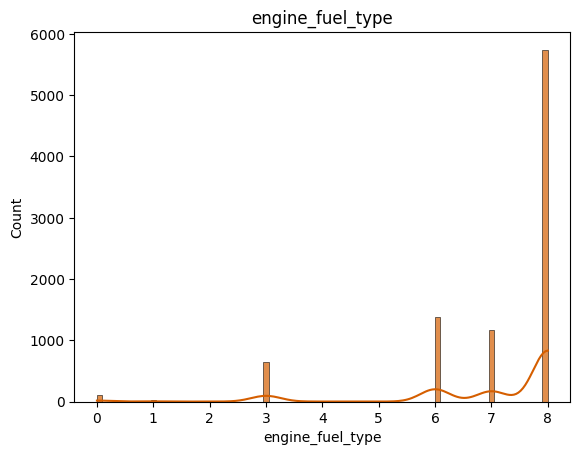

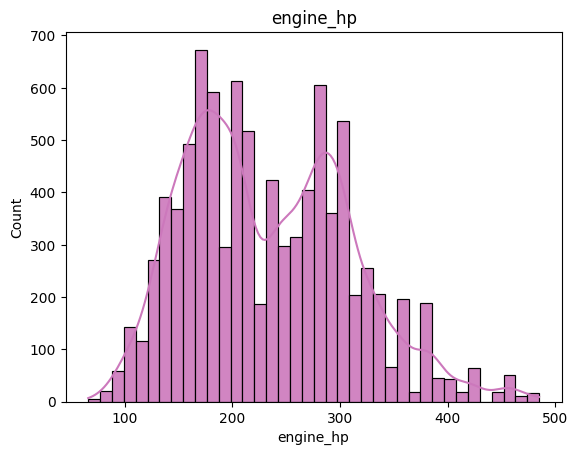

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("colorblind", n_colors=len(ds.columns))
shades = [0.1, 0.3, 0.5, 0.7, 0.9]

for col, color, shade in zip(ds.columns, colors, shades):
    if ds[col].dtypes != "object":
        sns.histplot(x=ds[col], kde=True, color=color, alpha=shade)
        plt.title(col)
        plt.show()



####**BOXPLOT**

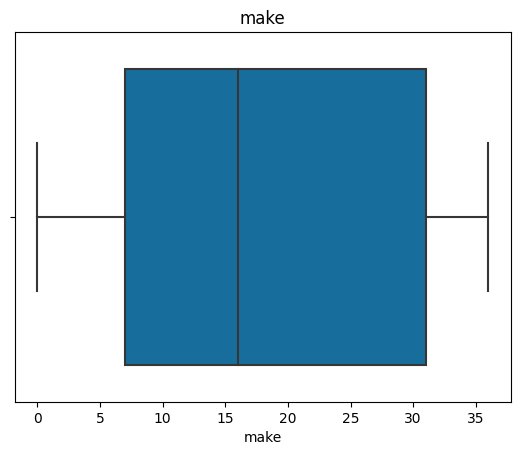

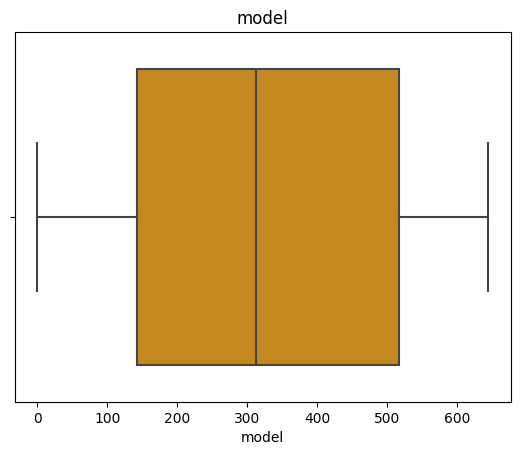

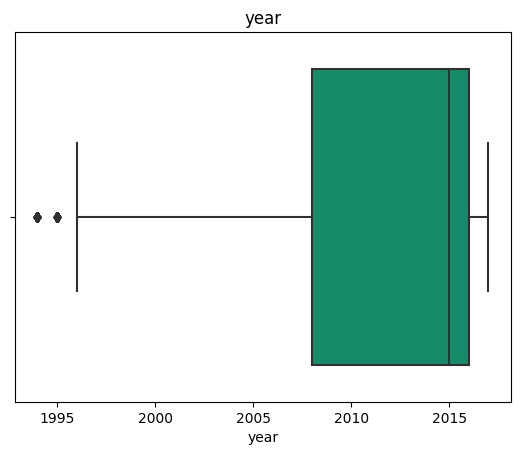

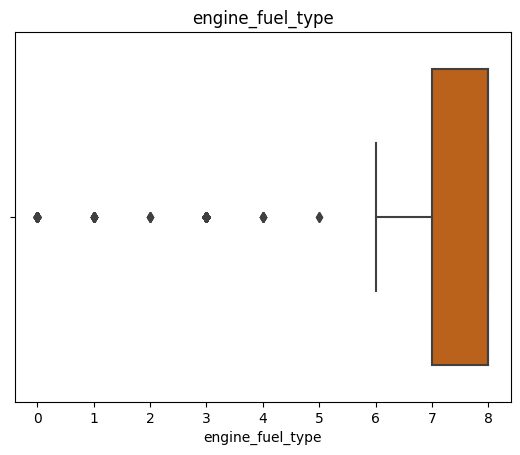

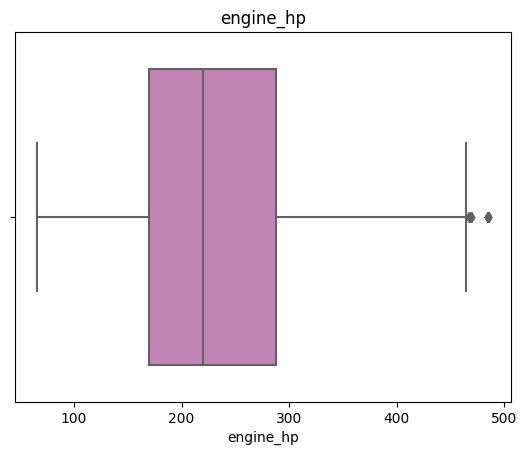

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = sns.color_palette("colorblind", n_colors=len(ds.columns))
shades = [0.1, 0.3, 0.5, 0.7, 0.9]

for col, color, shade in zip(ds.columns, colors, shades):
    if ds[col].dtypes != "object":
        sns.boxplot(x=ds[col], color=color)
        plt.title(col)
        plt.show()

####**Setting the outlier limits**

In [19]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col, [75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [20]:
for i in ds.columns:
    if ds[i].dtypes != "object":
        UL,LL = outlier_limit(ds[i])
        ds[i] = np.where((ds[i]>UL)|(ds[i]<LL), np.nan, ds[i])

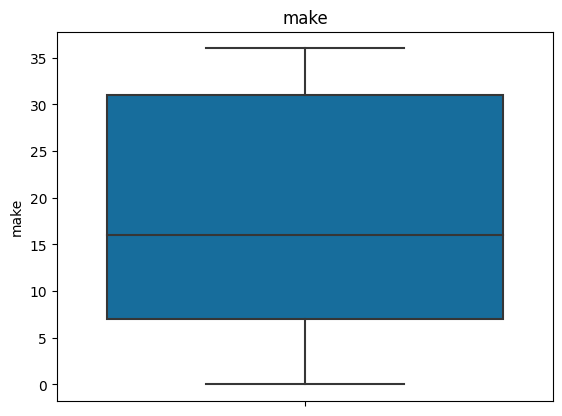

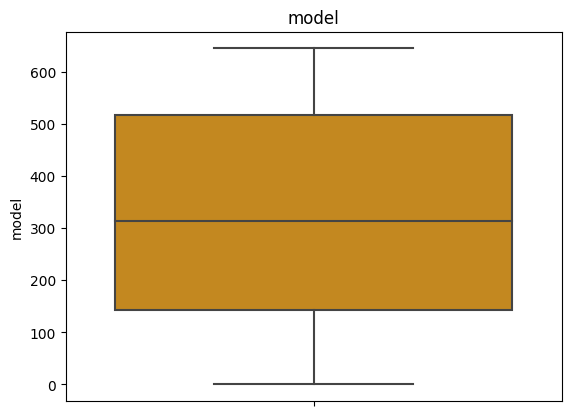

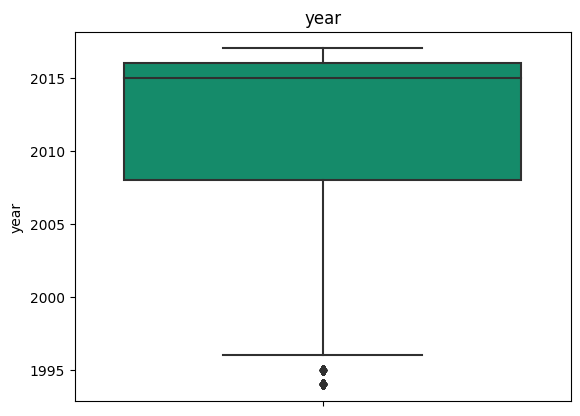

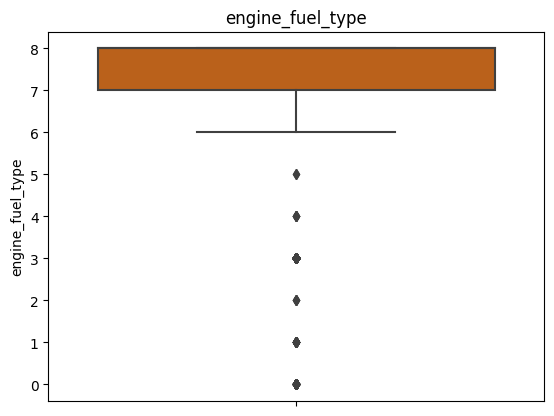

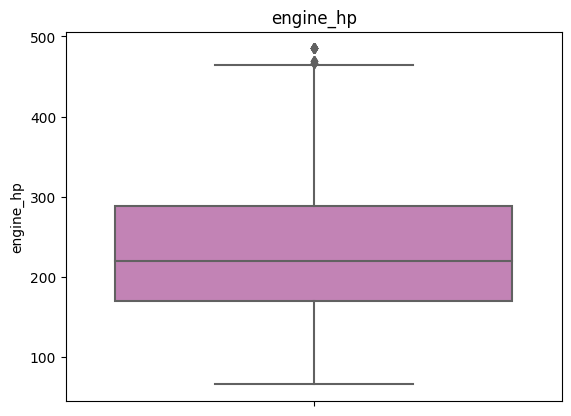

In [57]:
colors = sns.color_palette("colorblind")
shades = [0.1, 0.3, 0.5, 0.7, 0.9]

for col, color, shade in zip(ds.columns, colors, shades):
    if ds[col].dtypes != "object":
        sns.boxplot(y=ds[col], color=color)
        plt.title(col)
        plt.show()

In [22]:
ds.isnull().mean()*100

make                 0.000000
model                0.000000
year                 5.548095
engine_fuel_type     0.000000
engine_hp            4.272285
engine_cylinders     2.996475
transmission_type    0.000000
driven_wheels        0.000000
number_of_doors      0.000000
market_category      0.000000
vehicle_size         0.000000
vehicle_style        0.000000
highway_mpg          1.611549
city_mpg             2.652342
popularity           7.394662
msrp                 8.359913
dtype: float64

In [23]:
ds.dropna(inplace=True)

In [24]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9084 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               9084 non-null   object 
 1   model              9084 non-null   object 
 2   year               9084 non-null   float64
 3   engine_fuel_type   9084 non-null   object 
 4   engine_hp          9084 non-null   float64
 5   engine_cylinders   9084 non-null   float64
 6   transmission_type  9084 non-null   object 
 7   driven_wheels      9084 non-null   object 
 8   number_of_doors    9084 non-null   float64
 9   market_category    9084 non-null   object 
 10  vehicle_size       9084 non-null   object 
 11  vehicle_style      9084 non-null   object 
 12  highway_mpg        9084 non-null   float64
 13  city_mpg           9084 non-null   float64
 14  popularity         9084 non-null   float64
 15  msrp               9084 non-null   float64
dtypes: float64(8), object(8

####**Checking the correlation with the target 'msrp'**

In [25]:
non_numeric_cols = ds.select_dtypes(exclude=['int', 'float']).columns

In [26]:
label_encoder = LabelEncoder()
for col in non_numeric_cols:
    ds[col] = label_encoder.fit_transform(ds[col].astype(str))

<Axes: title={'center': 'Feature-correlation (pearson)'}>

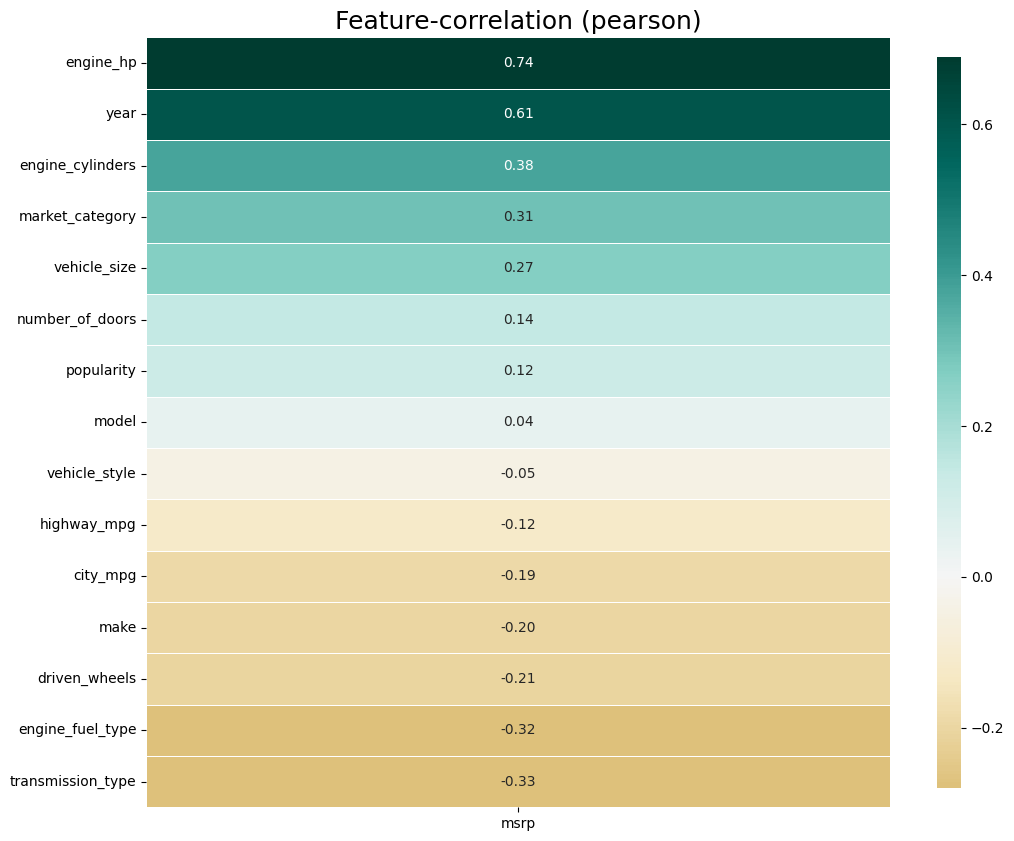

In [27]:
import klib as k
k.corr_plot(data=ds, target='msrp')

In [28]:
correlation_matrix = ds.corr()
print(correlation_matrix['msrp'])


make                -0.199710
model                0.040748
year                 0.606315
engine_fuel_type    -0.315742
engine_hp            0.739611
engine_cylinders     0.379259
transmission_type   -0.326670
driven_wheels       -0.206789
number_of_doors      0.142302
market_category      0.305221
vehicle_size         0.266789
vehicle_style       -0.047091
highway_mpg         -0.120786
city_mpg            -0.192441
popularity           0.118664
msrp                 1.000000
Name: msrp, dtype: float64


####**Lets take only the columns with good correlation with the target**

In [29]:
x=ds[['engine_hp','year','engine_cylinders','vehicle_style','popularity','model','engine_fuel_type']].values
y=ds[['msrp']].values

####**Feature Scaling**

In [30]:
sc = StandardScaler()
x = sc.fit_transform(x)

####**Splitting the data into training and testing set**

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso 
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor 
from sklearn.svm import LinearSVR

In [33]:
models={
    "linearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "Lasso":Lasso(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "BaggingRegressor":BaggingRegressor(),
    "HistgradientBoostingRegressor":HistGradientBoostingRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor(random_state=0)
}

In [34]:
for name,model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score=model.score(x_train, y_train)*100
    testing_score=model.score(x_test, y_test)*100
    score= r2_score(y_test, model.predict(x_test))*100
    mae=mean_absolute_error(y_test, model.predict(x_test))
    mse=mean_squared_error(y_test, model.predict(x_test))
    rmse=np.sqrt(mse)
    print("r2score:",score)
    print("training_score:",training_score)
    print("testing_score:",testing_score)
    print("mae:",mae)
    print("mse:",mse)
    print("rmse_test:",rmse)
    print("*"*100)

model trained with linearRegression
r2score: 70.2824105832389
training_score: 70.67796245600191
testing_score: 70.2824105832389
mae: 6165.862770905822
mse: 66053183.404056765
rmse_test: 8127.310957755755
****************************************************************************************************
model trained with Ridge
r2score: 70.28222139915034
training_score: 70.67796001262288
testing_score: 70.28222139915034
mae: 6165.956008735179
mse: 66053603.90287728
rmse_test: 8127.336827207131
****************************************************************************************************
model trained with LinearSVR
r2score: -239.3286878396531
training_score: -240.38537007706523
testing_score: -239.3286878396531
mae: 23927.231845057544
mse: 754224703.013391
rmse_test: 27463.151731245107
****************************************************************************************************
model trained with Lasso
r2score: 70.28194863588449
training_score: 70.67795795146102
testing_sc

In [35]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : linearRegression
AVERAGE RMSE:  8316.2519392015
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  8316.218957671288
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  27312.81570014764
****************************************************************************************************
cross validation model : Lasso
AVERAGE RMSE:  8316.257178396952
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  5861.988808301046
****************************************************************************************************
cross validation model : BaggingRegressor
AVERAGE RMSE:  6488.659563677194
*******************************************************************

#### We can see that RandomForest Regressor is having the best overall performance so far. We may proceed with it.

#**Modeling**

In [36]:
RF = RandomForestRegressor()

In [37]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [38]:
y_pred = RF.predict(x_test)

In [39]:
mse = mean_squared_error(y_test, y_pred)
mse

13318139.846216092

In [40]:
rmse = np.sqrt(mse)
rmse

3649.402669782562

In [41]:
y_pred=model.predict(x)


In [42]:
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=("ACTUAL","PREDICTED"),dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,46135.0,45653.454762
1,40650.0,41037.100000
2,36350.0,37641.900000
3,29450.0,30344.000000
4,34500.0,34862.500000


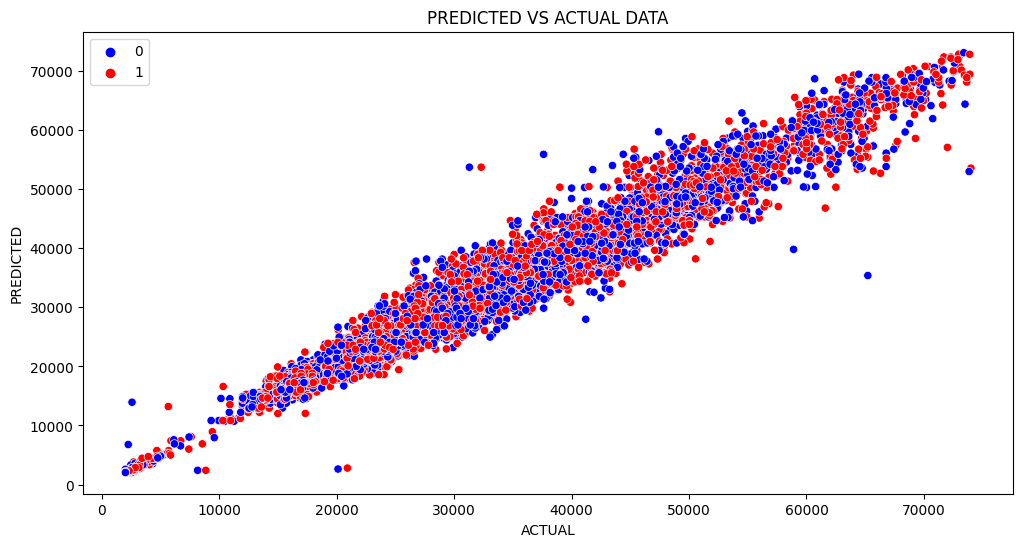

In [43]:
plt.figure(figsize=(12, 6))
plt.title("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTED", hue=OUTPUT.index % 2, palette=["blue", "red"])
plt.show()

The RandomForestRegressor model achieved an RMSE of approximately 3660.45 on the test data, indicating the average deviation between the predicted and actual values.
The scatter plot visualization provides a visual comparison between the predicted and actual values. The closer the points align to the diagonal line (x = y), the better the model's predictions match the actual values.

#**Fine Tuning**

In [44]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

In [45]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=0),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           n_jobs=-1)

In [46]:
# Perform grid search on the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [47]:
# Print the best parameter settings and corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", np.sqrt(-grid_search.best_score_))

Best parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best score:  3517.9914468254237


In [48]:
# Get the best model from the grid search
best_model = grid_search.best_estimator_

In [49]:
# Evaluate the best model on the test data
predictions = best_model.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE on test data: ", rmse)

RMSE on test data:  3621.302128488664


The fine-tuning process aimed to optimize the RandomForestRegressor model by finding the best combination of hyperparameters. The identified best model, with the specified parameter settings, achieved an RMSE of 3621 on the test data. This suggests that the model's predictions, on average, deviate by approximately $3621 from the actual values. The lower the RMSE, the better the model's performance, indicating that the fine-tuned RandomForestRegressor model achieved reasonable predictive accuracy on the test data.